In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import logging
from pathlib import Path
import random
from typing import Any

import torch
import torchvision as tv
from torchvision.transforms import v2 as transforms
from torch.utils.data.dataloader import DataLoader

import bb
import tt

LOG = logging.getLogger(__name__)
tt.logging_init()

SEED = 325
random.seed(SEED)

In [17]:
data_path = Path.home() / "src/data"
mc_data_path = data_path / "minecraft/info.json"
dset = bb.Dataset.load(mc_data_path)
torch_root = data_path / "torchvision"

IMAGES_PATH = str(torch_root / "COCO/val2017")
ANNOTATIONS_PATH = str(torch_root / "COCO/annotations/instances_val2017.json")

In [18]:
tdset = bb.TorchDataset(data_path / "minecraft")
tdset

Dataset TorchDataset
    Number of datapoints: 408
    Root location: /Users/joe/src/data/minecraft

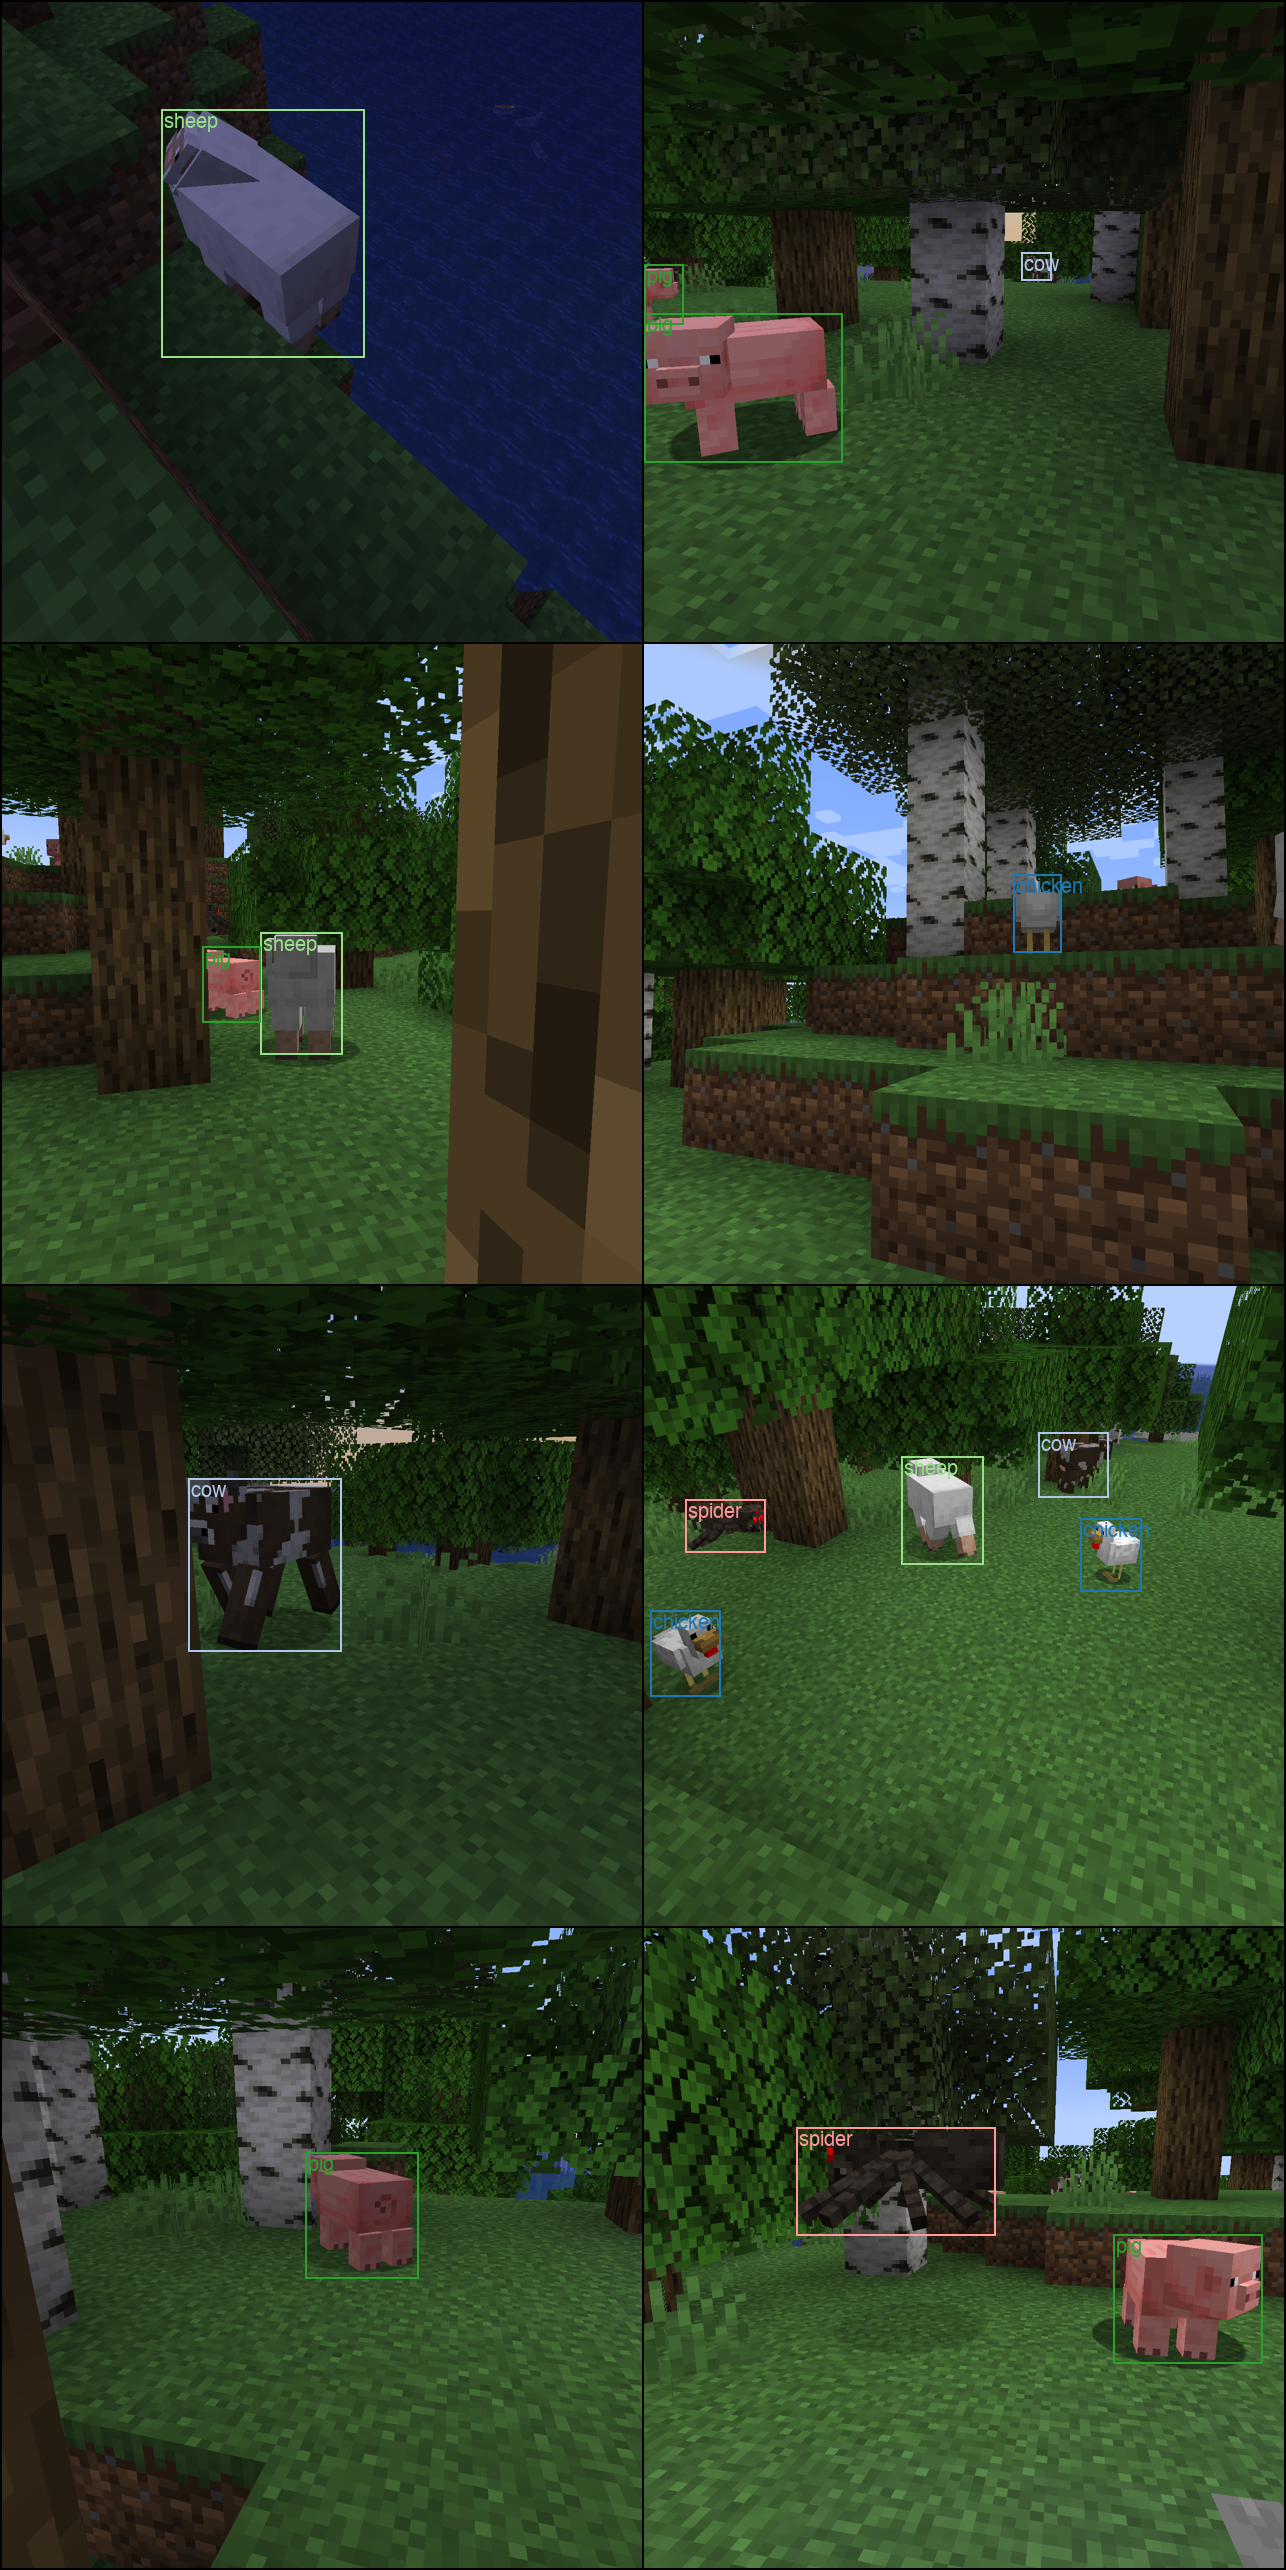

In [38]:
loader = DataLoader(tdset, batch_size=8, collate_fn=bb.TorchDataset.collate_fn)
images, targets = next(iter(loader))
result = tv.utils.make_grid(
    [bb.torch_plot_bb(img, target, tdset.categories) for img, target in zip(images, targets)], nrow=2
)
transforms.functional.to_pil_image(result)

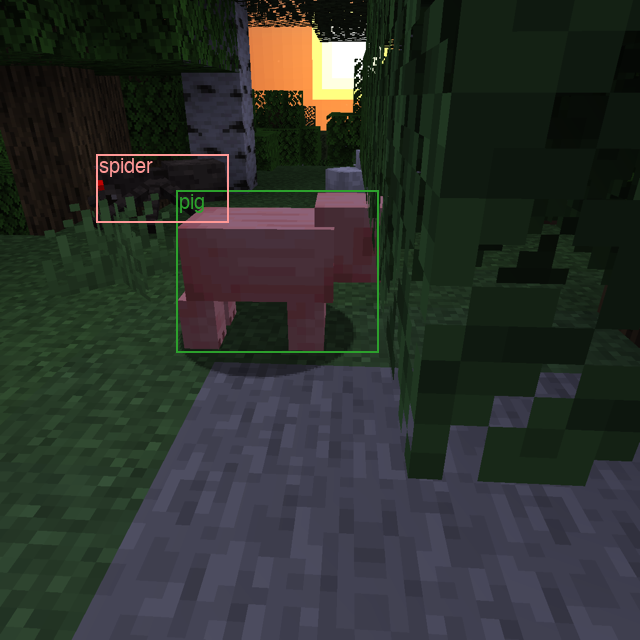

In [39]:
img, target = tdset[10]
categories = tdset.dset.categories
label_names = [categories[label.item()] for label in target["labels"]]
result = bb.torch_plot_bb(img, target, tdset.categories)
transforms.functional.to_pil_image(result)

In [ ]:
coco_dataset1 = tv.datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)
coco_dataset2 = tv.datasets.wrap_dataset_for_transforms_v2(coco_dataset1)

sample = coco_dataset1[0]
img, target = sample
print(type(img))
target

In [ ]:
coco_categories = {
    cat["id"]: cat["name"] for cat in coco_dataset2.coco.loadCats(coco_dataset2.coco.getCatIds())
}
print(coco_categories)
label_names = [coco_categories[label.item()] for label in target["labels"]]
print(label_names)

In [ ]:
coco_loader = DataLoader(coco_dataset2, batch_size=64)
next(iter(loader))